### **<span style="color:green">VISÃO GERAL DA BASE DE DADOS: Titanic</span>**

Esta base de dados contém informações sobre os passageiros do Titanic, o famoso navio que afundou em 1912. Ela é amplamente utilizada para análises de sobrevivência e para entender os fatores que influenciaram a sobrevivência dos passageiros. Aqui estão algumas das variáveis incluídas:

- **PassengerId**: Identificador único de cada passageiro.
- **Survived**: Indica se o passageiro sobreviveu (1) ou não (0).
- **Pclass**: Classe do bilhete do passageiro (1ª, 2ª, 3ª).
- **Name**: Nome do passageiro.
- **Sex**: Sexo do passageiro.
- **Age**: Idade do passageiro.
- **SibSp**: Número de irmãos/cônjuges a bordo do Titanic.
- **Parch**: Número de pais/filhos a bordo do Titanic.
- **Ticket**: Número do bilhete.
- **Fare**: Tarifa paga pelo bilhete.
- **Cabin**: Número da cabine.
- **Embarked**: Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton).

A meta é entender como diferentes características dos passageiros e suas condições de viagem podem influenciar a probabilidade de sobrevivência no naufrágio do Titanic. Essa base de dados pode ser usada para diversas análises, como identificar padrões de sobrevivência, visualizar tendências demográficas dos passageiros e realizar previsões sobre fatores que afetaram as chances de sobrevivência.

Link para a competição do Kaggle: https://www.kaggle.com/competitions/titanic/overview

---

### **<span style="color:green">IMPORTS E CONFIGURAÇÕES</span>**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, auc
import matplotlib.pyplot as plt

#!pip install ipywidgets

In [6]:
# prompt: Crie para mim um método que recebe uma lista de textos e exiba um conjunto de radio buttons

import ipywidgets as widgets
from IPython.display import display

def exibir_alternativas(textos):
  radio_buttons = widgets.RadioButtons(
      options=textos,
      description='',
      disabled=False
  )
  display(radio_buttons)

In [7]:
def calcular_roc_auc(y_true, y_pred):
    # Calcular a curva ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    
    # Calcular a área sob a curva (AUC)
    roc_auc = auc(fpr, tpr)
    
    return roc_auc

In [8]:
def plot_roc_auc(y_true, y_pred):
    # Gerar curva de precisão-revocação
    precision, recall, _ = precision_recall_curve(y_true, y_pred)

    plt.figure(figsize=(14, 7))

    # Subplot para a curva de precisão-revocação
    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    # Subplot para a curva ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, marker='.', label='ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Mostrar os gráficos
    plt.show()

### **<span style="color:green">VISÃO GERAL DOS DADOS</span>**

In [9]:
CAMINHO_BASE_TREINAMENTO = 'C:/Users/clayt/Projetos/IDP/ml-01/dados/titanic/train.csv'
CAMINHO_BASE_TESTE = 'C:/Users/clayt/Projetos/IDP/ml-01/dados/titanic/test.csv'

Função que recebe um path de um csv e retorna um dataframe

In [10]:
def carregar_dados(path: str):
  dados = pd.read_csv(path)
  return dados

In [11]:
def obter_treino_e_teste(df: pd.DataFrame, perc_treino: float = 0.8):
    treino, teste = train_test_split(df, train_size=perc_treino ,random_state=42)
    return treino, teste  

Utilize a função `carregar_dados(path: str)` para obter um dataframe a partir da planilha train.csv (CAMINHO_BASE_TREINAMENTO)

In [12]:
df = carregar_dados(path=CAMINHO_BASE_TREINAMENTO)

Liste as 3 primeiras linhas do dataframe utilizando a função `head()`

Liste as últimas linhas do dataframe utilizando a função `tail()`

Utilize a função `info()` para responder as seguintes perguntas: Existem colunas com valores vazios? Quais são os tipos dos dados? Quantas linhas tem o arquivo? 

Existem valores discrepantes em colunas do dataframe? Utilize a função `describe()` para isso.

### **<span id="id_secao_prevendo_sobreviventes" style="color:green">PREVEJA OS SOBREVIVENTES</span>**

Utilize o train_test_split do pacote sklearn.model_selection para dividir os dados em treinamento e teste. Em geral, utilizam-se (80-70)% para treino (30-20)% por cento para testes. 

In [347]:
treino, teste = "Chame o método aqui"

Crie o X e y de treino e teste conforme apresentado nos últimos notebooks. Utilize apenas as colunas <span style="color:red">'Pclass', 'Fare', 'SibSp', 'Parch'</span> nesse primeiro momento. **Dica**: Crie um array para armazenar as colunas para facilitar a inclusão ou remoção de features.  

In [348]:
cols_to_predict = ['Pclass', 'Fare', 'SibSp', 'Parch']

In [349]:
x_treino = ""
y_treino = ""

x_teste = ""
y_teste = ""

Treine o modelo LinearRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

linear_model = "Instancie o objeto"
linear_model.fit("Passe os argumentos")

Faça previsões do valor médio dos imóveis e compare os valores reais e os valores previstos. 

In [ ]:
ypred = linear_model.predict("Passe os argumentos para a predição.")

print(f'Valores Reais: {y_teste.to_list()[:5]}')
print(f'Valores previstos: {ypred[:5]}')

### **<span style="color:green">AVALIE O DESEMPENHO DO MODELO</span>**

**Revisão das principais métricas de Avaliação para Algoritmos de Classificação**

- **Acurácia** mede a proporção de previsões corretas em relação ao total de previsões.
- **Precisão** avalia a proporção de verdadeiros positivos em relação ao total de positivos previstos.
- **Recall (Revocação)** mede a proporção de verdadeiros positivos em relação ao total de positivos reais.

Calcule as métricas de acurácia, precisão, revocação e roc_auc.

In [352]:
acuracia = accuracy_score("Informe aqui os argumentos")
precisao = precision_score("Informe aqui os argumentos")
revocacao = recall_score("Informe aqui os argumentos")
roc_auc = calcular_roc_auc("Informe aqui os argumentos")

Imprima os valores das métricas.

In [ ]:
print(f'Acurácia: {round("Inserir variável", 5)}')
print(f'Precisão: {round("Inserir variável", 5)}')
print(f'Revocação: {round("Inserir variável", 5)}')
print(f'ROC-AUC: {round("Inserir variável", 5)}')

Utilize a função `plot_roc_auc()`, desenvolvida por nós em momentos anteriores, para visualizar a o gráfico de curva roc_auc. 

**Importância da Curva ROC e AUC**

**Curva ROC**
- **Avaliação Visual**: Mostra a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR).
- **Comparação de Modelos**: Permite comparar diferentes modelos de classificação.
- **Detecção de Desempenho**: Ajuda a identificar se o modelo está performando bem.

**AUC (Área Sob a Curva)**
- **Resumo Numérico**: Fornece um valor que resume a performance do modelo, variando de 0 a 1.
- **Independência do Limiar**: Avalia a habilidade do modelo sem depender de um limiar específico.
- **Probabilidade de Classificação Correta**: Indica a probabilidade de classificar corretamente pares de exemplos positivos e negativos.

Esse modelo tem uma boa performance? Certamente, não! Um modelo que preveja que todos os homens morrem e todas as mulheres sobrevivem é melhor do que o modelo que acabamos de treinar.

In [ ]:
from copy import copy

temp = copy(teste)
temp['Survived'] = temp['Sex'].map(lambda sex: 1 if sex=='female' else 0)

acuracia = accuracy_score()
precisao = precision_score()
revocacao = recall_score()
roc_auc = calcular_roc_auc()

print(f'Acurácia: {round("", 5)}')
print(f'Precisão: {round("", 5)}')
print(f'Revocação: {round("", 5)}')
print(f'ROC-AUC: {round("", 5)}')

### **<span style="color:green">CRIE NOVAS CARACTERÍSTICAS(FEATURE ENGINEERING) E REAVALIE O MODELO</span>**

Como você pode observar no gráfico da seção anterior, o sexo é uma feature(característica, atributo) importante, mas não pode ser submetida aos algoritmos de Machine Learning porque é uma string. Converta essa feature para inteiro utilizando a função `map()` do pandas. 

In [356]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [357]:
df.Sex = df.Sex.map({'male': 0, 'female': 1})
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


É razoável supor que crianças tiveram prioridade de embarque nos botes salva-vidas. Crie um atributo para indicar se o passageiro é criança ou adulto. **DICA**: Utilize essa feature com a função `map()` combinada com expressão lambda.

In [358]:
df['isChild'] = df.Age.map(lambda age: 1 if age < 0 else 0)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isChild
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0


Utilize o método `obter_treino_e_teste(df=df)` para dividir o dataframe df em treino e teste. Instancie, treine, faça previsões.

In [ ]:
cols_to_predict = ['Pclass', 'Fare', 'SibSp', 'Parch', 'Sex', 'isChild']

treino, teste = #Obtenha os dataframes conforme indicado no comentário acima.

linear_model = # utilize o modelo de regressão logística
linear_model.fit()  # treine o modelo

ypred = linear_model.predict() # faça as previsões

Analise a performance.

In [ ]:
acuracia = accuracy_score(y_pred=ypred, y_true=teste.Survived)
precisao = precision_score(y_pred=ypred, y_true=teste.Survived)
revocacao = recall_score(y_pred=ypred, y_true=teste.Survived)
roc_auc = calcular_roc_auc(y_pred=ypred, y_true=teste.Survived)

print(f'Acurácia: {round(acuracia, 5)}')
print(f'Precisão: {round(precisao, 5)}')
print(f'Revocação: {round(revocacao, 5)}')
print(f'ROC-AUC: {round(roc_auc, 5)}')

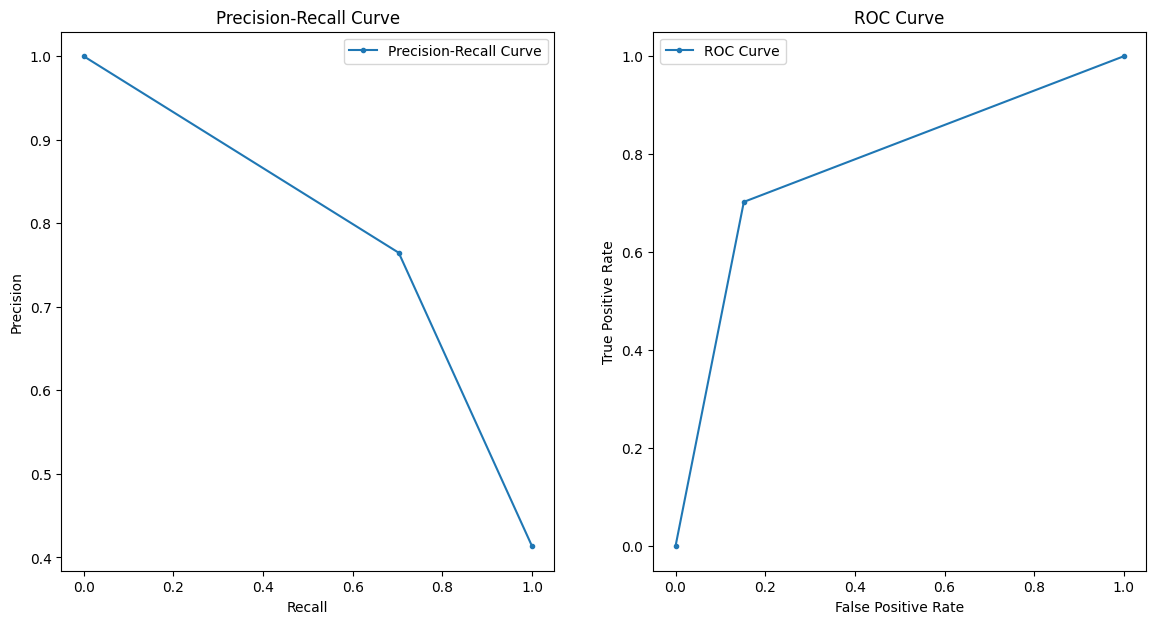

In [363]:
plot_roc_auc(y_true=teste.Survived, y_pred=ypred)